## Titanic Classification

#### Import Library

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
titanic = pd.read_csv('./data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Preprocessing

In [8]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
titanic.Age.fillna(titanic.Age.mean(), inplace=True)
titanic.Embarked.fillna(titanic.Embarked.mode(), inplace=True)
titanic.Cabin.fillna('UNK', inplace=True)

In [12]:
# 각 특성별 분포 혹은 빈도 확인
print('Sex Value:\n',titanic.Sex.value_counts())
print('Pclass Value:\n',titanic.Pclass.value_counts())
print('etc...')

Sex Value:
 male      577
female    314
Name: Sex, dtype: int64
Pclass Value:
 3    491
1    216
2    184
Name: Pclass, dtype: int64
etc...


In [13]:
titanic.Cabin = titanic.Cabin.str[:1]
titanic.Cabin.value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [14]:
# 가치 없는 특성은 삭제
col = ['PassengerId', 'Name', 'Ticket']
titanic = titanic.drop(col, axis='columns')
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,U,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,U,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,U,S


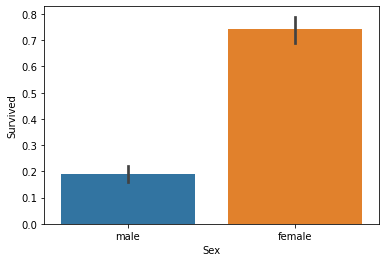

In [17]:
sns.barplot(x='Sex', y='Survived', data=titanic);

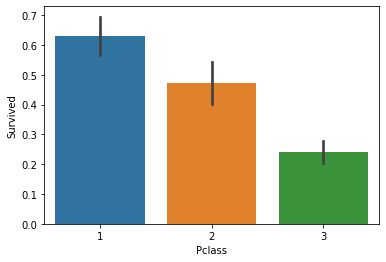

In [18]:
sns.barplot(x='Pclass', y='Survived', data=titanic);

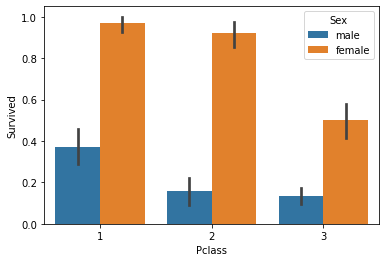

In [19]:
sns.barplot(x='Pclass', y='Survived', data=titanic, hue='Sex');

In [20]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex','Cabin','Embarked']
for col in cols:
    le= LabelEncoder()
    titanic[col] = le.fit_transform(titanic[col])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,8,2
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,8,2
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,8,2


#### Modeling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = titanic.drop('Survived', axis=1)
y = titanic.Survived

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=2022
)

dt = DecisionTreeClassifier(random_state=2022)

dt.fit(X_train, y_train)

pred = dt.predict(X_test)

#### Evaluation

In [31]:
from sklearn.metrics import confusion_matrix
pred = dt.predict(X)
confusion_matrix(y, pred)

array([[518,  31],
       [ 41, 301]], dtype=int64)

In [29]:
pred_prob = dt.predict_proba(X)

In [41]:
pred_prob[:,1]

array([0.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.83333333, 0.        , 0.        ,
       1.        , 0.25      , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.83333333, 0.        , 0.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 0.5       , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.     

In [30]:
threshold = 0.5
confusion_matrix(y, pred_prob[:,1]>threshold)

array([[518,  31],
       [ 41, 301]], dtype=int64)

In [32]:
threshold = 0.4
confusion_matrix(y, pred_prob[:,1]>threshold)

array([[513,  36],
       [ 38, 304]], dtype=int64)

In [34]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y, pred_prob[:,1])

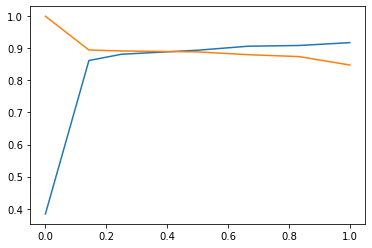

In [36]:
plt.plot(thresholds, precisions[0:len(thresholds)])
plt.plot(thresholds, recalls[0:len(thresholds)])

In [37]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [38]:
accuracy_score(y, pred_prob[:,1]>0.5)

0.9191919191919192

In [39]:
accuracy_score(y, pred_prob[:,1]>0.3)

0.9169472502805837

In [42]:
f1_score(y, pred_prob[:,1]>0.3)

0.8914956011730205

In [43]:
from sklearn.metrics import roc_curve

fprs, tprs, threshold = roc_curve(y, pred_prob[:,1])
pd.DataFrame({'fprs':fprs[:len(thresholds)], 'tprs':tprs[:len(thresholds)], 'Threshold':thresholds})

,fprs,tprs,Threshold
0,0.000000,0.000000,0.000000
1,0.047359,0.847953,0.142857
2,0.054645,0.874269,0.250000
3,0.056466,0.880117,0.500000
4,0.065574,0.888889,0.666667
5,0.074681,0.891813,0.833333
6,0.089253,0.894737,1.000000


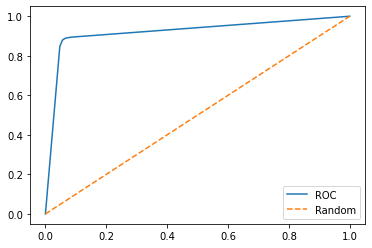

In [44]:
plt.plot(fprs, tprs, label='ROC')
plt.plot([0,1], [0,1], '--', label='Random')
plt.legend();

In [45]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, pred_prob[:,1])

0.9199448225907818

<font color="#CC3D3D"><p>
# Measuring Model Performance

<font color='green'><p>
###  Confusion Matrix ###
<br>
<img align="left" src="http://drive.google.com/uc?export=view&id=1wIJIJENLCnfoesuTUMDjywPLMJnat36E" width=1000 height=500>

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9  # 숫자 9를 posive class로 설정하여 불균형 데이터 생성

In [3]:
# y가 ture(숫자 9)인 비율
(y == True).mean()

0.1001669449081803

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=2022)

In [5]:
# Class label 중에 무조건 다수인 것으로 예측
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(C=0.0001).fit(X_train, y_train)
pred_logit = logit.predict(X_test)

### Accuracy ###

In [6]:
# Accuracy
from sklearn.metrics import accuracy_score

print("dummy:", accuracy_score(y_test, pred_dummy))
print("tree:", accuracy_score(y_test, pred_tree))
print("logit:", accuracy_score(y_test, pred_logit))

dummy: 0.9088888888888889
tree: 0.9377777777777778
logit: 0.9244444444444444


###  Confusion Matrix ###

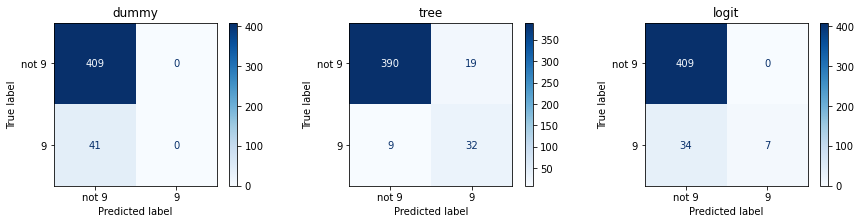

In [9]:
from sklearn.metrics import plot_confusion_matrix  # sklearn 0.22

fig, ax = plt.subplots(1, 3, figsize=(15,3))
plot_confusion_matrix(dummy, X_test, y_test, display_labels=["not 9", "9"], cmap=plt.cm.Blues, ax=ax[0])
plot_confusion_matrix(tree, X_test, y_test, display_labels=["not 9", "9"], cmap=plt.cm.Blues, ax=ax[1])
plot_confusion_matrix(logit, X_test, y_test, display_labels=["not 9", "9"], cmap=plt.cm.Blues, ax=ax[2])
ax[0].set_title('dummy')
ax[1].set_title('tree')
ax[2].set_title('logit')
plt.show()

### Recall, Precision & F1 ###

In [10]:
from sklearn.metrics import classification_report

print("dummy:")
print(classification_report(y_test, pred_dummy, target_names=["not 9", "9"]))
print("\ntree:")
print(classification_report(y_test, pred_tree, target_names=["not 9", "9"]))
print("\nlogit:")
print(classification_report(y_test, pred_logit, target_names=["not 9", "9"]))

dummy:
              precision    recall  f1-score   support

       not 9       0.91      1.00      0.95       409
           9       0.00      0.00      0.00        41

    accuracy                           0.91       450
   macro avg       0.45      0.50      0.48       450
weighted avg       0.83      0.91      0.87       450


tree:
              precision    recall  f1-score   support

       not 9       0.98      0.95      0.97       409
           9       0.63      0.78      0.70        41

    accuracy                           0.94       450
   macro avg       0.80      0.87      0.83       450
weighted avg       0.95      0.94      0.94       450


logit:
              precision    recall  f1-score   support

       not 9       0.92      1.00      0.96       409
           9       1.00      0.17      0.29        41

    accuracy                           0.92       450
   macro avg       0.96      0.59      0.63       450
weighted avg       0.93      0.92      0.90       45

##### PR curve

In [11]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve  # sklearn 0.22

# AP(Average Precision)
print('dummy: ', average_precision_score(y_test, dummy.predict_proba(X_test)[:,1]))
print('tree: ', average_precision_score(y_test, tree.predict_proba(X_test)[:,1]))
print('logit: ', average_precision_score(y_test, logit.predict_proba(X_test)[:,1]))

dummy:  0.09111111111111111
tree:  0.587358230287562
logit:  0.8187499963680338


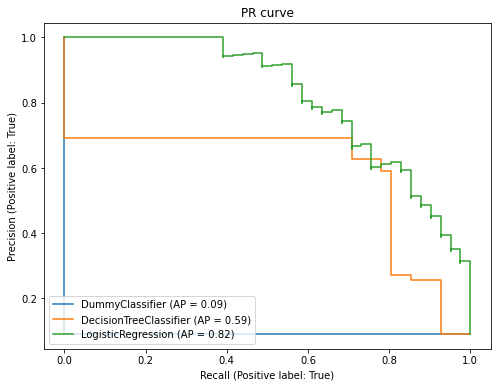

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
plot_precision_recall_curve(dummy, X_test, y_test, ax=ax)
plot_precision_recall_curve(tree, X_test, y_test, ax=ax)
plot_precision_recall_curve(logit, X_test, y_test, ax=ax)
ax.set_title('PR curve')
plt.show()

##### PR by threshold

In [13]:
def plot_precision_recall_by_threshold(precisions, recalls, thresholds) :
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    # plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    _, end = plt.xlim()
    plt.xticks(np.round(np.arange(0, end, 0.1),2))    
    # x축, y축 label과 legend, grid, title 설정
    plt.xlabel('Threshold'); #plt.ylabel('Precision & Recall')
    plt.legend(); plt.grid(); plt.title('PR by threshold')
    plt.show()

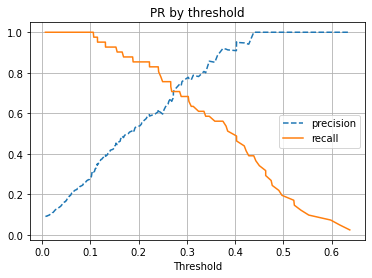

In [14]:
precisions, recalls, thresholds = precision_recall_curve(y_test, logit.predict_proba(X_test)[:,1])
plot_precision_recall_by_threshold(precisions, recalls, thresholds)

### ROC-AUC 

<img align="left" src="http://drive.google.com/uc?export=view&id=1Htx445FclSqHhhNxPT_uOYQOBiuneWXJ" width=1000 height=400>

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve  # sklearn 0.22

fpr, tpr, _ = roc_curve(y_test, dummy.predict_proba(X_test)[:,1])
print('dummy: ', auc(fpr, tpr))

fpr, tpr, _ = roc_curve(y_test, tree.predict_proba(X_test)[:,1])
print('tree: ', auc(fpr, tpr))

fpr, tpr, _ = roc_curve(y_test, logit.predict_proba(X_test)[:,1])
print('logit: ', auc(fpr, tpr))

dummy:  0.5
tree:  0.9116226370087662
logit:  0.9694674697358221


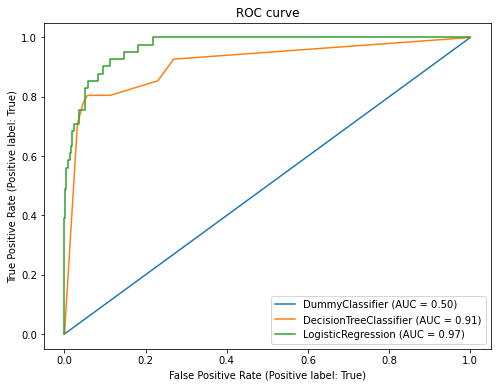

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
plot_roc_curve(dummy, X_test, y_test, ax=ax)
plot_roc_curve(tree, X_test, y_test, ax=ax)
plot_roc_curve(logit, X_test, y_test, ax=ax)
ax.set_title('ROC curve')
plt.show()